<a href="https://colab.research.google.com/github/tanvipenumudy/ML-Stream-Interns-Summer-21/blob/main/Internity_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")

In [15]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [18]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [19]:
df['cp'].unique()

array([3, 2, 1, 0])

In [20]:
df['target'].unique()

array([1, 0])

In [21]:
df.fillna(df['age'].mean(),inplace=True)

In [22]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
import warnings 
warnings.filterwarnings('ignore')

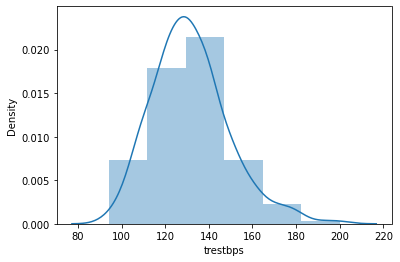

In [24]:
sns.distplot(df['trestbps'],bins=6)

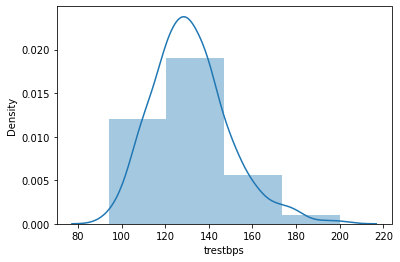

In [25]:
sns.distplot(df['trestbps'],bins=4)

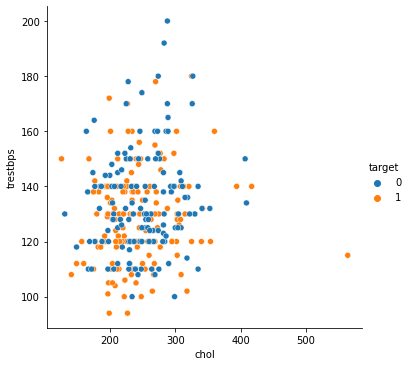

In [26]:
sns.relplot(x='chol',y='trestbps',hue='target',data=df)

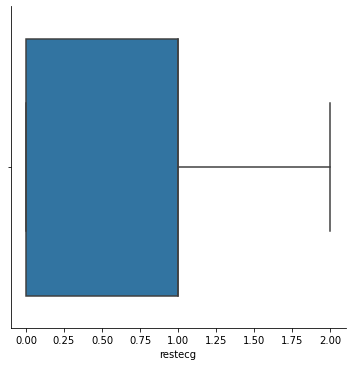

In [27]:
sns.catplot(x='restecg',kind='box',data=df)

In [28]:
df2=df.drop(['sex','trestbps','exang','oldpeak','slope','ca','thal'],axis=1)
df2

,age,cp,chol,fbs,restecg,thalach,target
0,63,3,233,1,0,150,1
1,37,2,250,0,1,187,1
2,41,1,204,0,0,172,1
3,56,1,236,0,1,178,1
4,57,0,354,0,1,163,1
...,...,...,...,...,...,...,...
298,57,0,241,0,1,123,0
299,45,3,264,0,1,132,0
300,68,0,193,1,1,141,0
301,57,0,131,0,1,115,0


In [29]:
a=df2.corr()

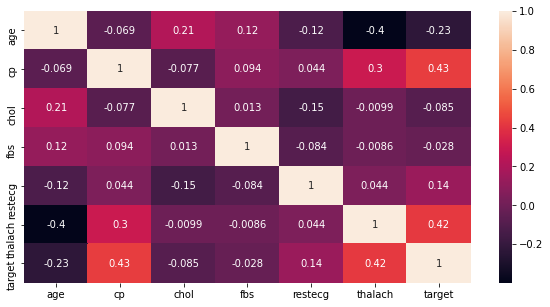

In [30]:
ax,fig=plt.subplots(figsize=(10,5))
ax=sns.heatmap(a,xticklabels=a.columns,yticklabels=a.columns,annot=True)

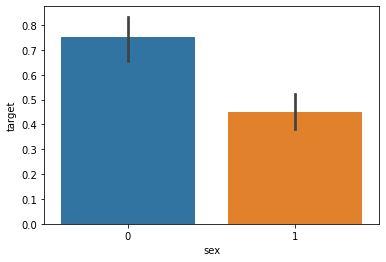

In [31]:
sns.barplot(df['sex'],df['target'])
plt.show()

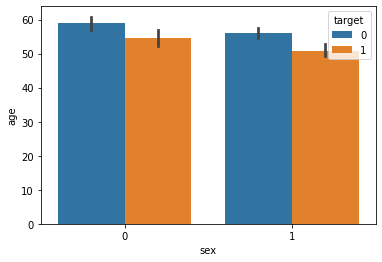

In [32]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

Text(0.5, 1.0, 'max heart rate of  patients  with heart disease')

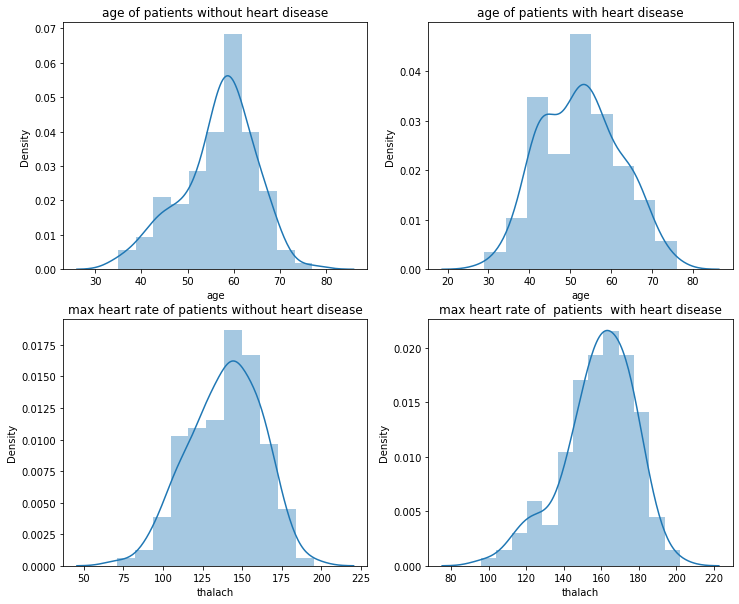

In [33]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('max heart rate of  patients  with heart disease')

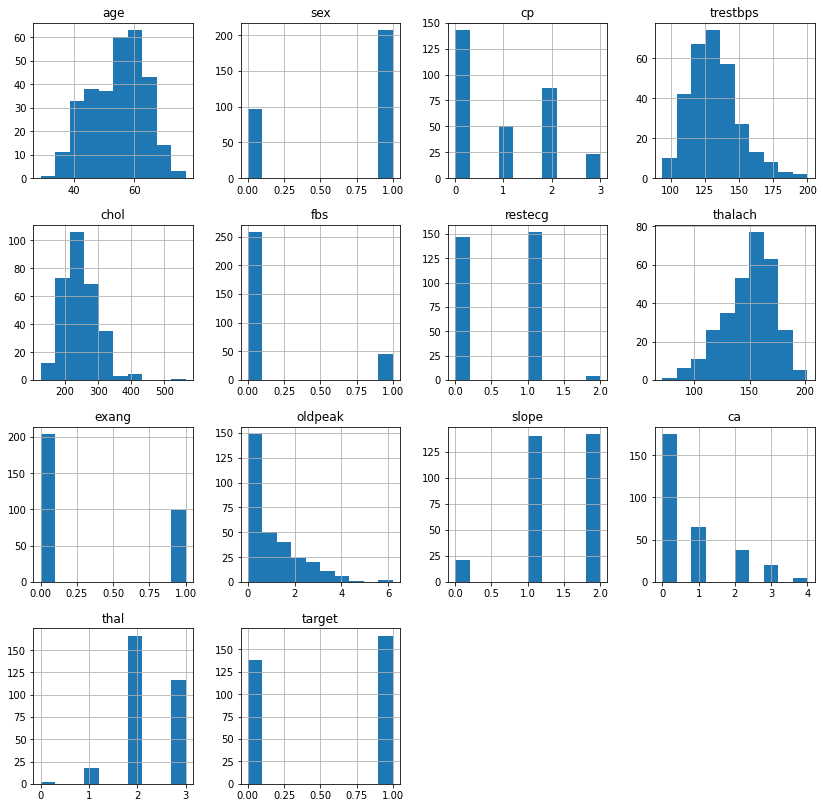

In [34]:
df.hist(figsize=(14,14))
plt.show()